# **Tugas Pengolahan Citra Digital - Huffman & RLE**

## **Import Library**

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter, defaultdict
import heapq
from PIL import Image

## **1. Huffman Coding untuk Data "EEFFFGGGHH"**

In [2]:
class Node:
    def __init__(self, char=None, freq=0):
        self.char = char
        self.freq = freq
        self.left = None
        self.right = None
    def __lt__(self, other):
        return self.freq < other.freq

def build_huffman_tree(data):
    freq = Counter(data)
    heap = [Node(c, f) for c, f in freq.items()]
    heapq.heapify(heap)
    while len(heap) > 1:
        n1 = heapq.heappop(heap)
        n2 = heapq.heappop(heap)
        merged = Node(freq=n1.freq + n2.freq)
        merged.left = n1
        merged.right = n2
        heapq.heappush(heap, merged)
    return heap[0]

def create_codes(root):
    codes = {}
    def helper(node, current=""):
        if node:
            if node.char:
                codes[node.char] = current
            helper(node.left, current + "0")
            helper(node.right, current + "1")
    helper(root)
    return codes

# Data input
huffman_data = "EEFFFGGGHH"
root = build_huffman_tree(huffman_data)
codes = create_codes(root)
encoded = "".join([codes[c] for c in huffman_data])

print("Kode Huffman:", codes)
print("Data Terkompresi:", encoded)

Kode Huffman: {'H': '00', 'E': '01', 'F': '10', 'G': '11'}
Data Terkompresi: 01011010101111110000


Insight:
- Huffman coding membuat kode lebih pendek untuk simbol yang sering muncul.
 Ini mengurangi total bit dibandingkan fixed-length coding.

## **2. RLE untuk Data "WWWWWWXYYYYYZZZZ"**

In [3]:
def rle_encode(data):
    encoded = []
    i = 0
    while i < len(data):
        count = 1
        while i + 1 < len(data) and data[i] == data[i + 1]:
            count += 1
            i += 1
        encoded.append((data[i], count))
        i += 1
    return encoded

rle_data = "WWWWWWXYYYYYZZZZ"
rle_encoded = rle_encode(rle_data)
print("RLE:", rle_encoded)

RLE: [('W', 6), ('X', 1), ('Y', 5), ('Z', 4)]


Insight:
- RLE cocok untuk data yang memiliki banyak pengulangan simbol secara berurutan seperti huruf atau pixel warna seragam.

## **3. Kuantisasi 5 Level**

In [4]:
pixels = [18, 45, 110, 180, 240]
bins = [0, 52, 103, 154, 205, 256]  # 5 level: 0-51, ..., 205-255
quantized = np.digitize(pixels, bins) - 1
print("Level Kuantisasi:", quantized)

Level Kuantisasi: [0 0 2 3 4]


Insight:
 - Digitize mengelompokkan nilai ke dalam bucket level, berguna untuk segmentasi warna atau grayscale.

## **4. Kompresi Huffman pada Saluran RGB**

Contoh data channel R: [225, 226, 226, 223, 222, 222, 222, 222, 224, 228]
Contoh data channel G: [137, 135, 136, 134, 134, 132, 130, 128, 131, 139]
Contoh data channel B: [127, 122, 122, 115, 114, 107, 109, 113, 110, 116]


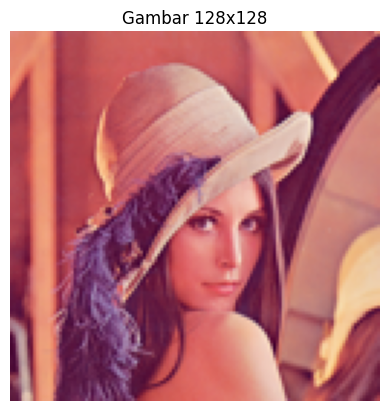

In [20]:
img_path = "lena.png"
img = Image.open(img_path).convert("RGB")

# --- Resize gambar untuk efisiensi proses ---
img = img.resize((128, 128))

# --- Pisahkan channel warna (R, G, B) ---
r, g, b = img.split()

# --- Fungsi: Flatten data channel menjadi 1D list ---
def flatten_channel(channel):
    return list(channel.getdata())

# --- Ambil data per channel ---
r_data = flatten_channel(r)
g_data = flatten_channel(g)
b_data = flatten_channel(b)

# --- Cetak contoh data untuk validasi ---
print("Contoh data channel R:", r_data[:10])
print("Contoh data channel G:", g_data[:10])
print("Contoh data channel B:", b_data[:10])

# --- Tampilkan gambar sebagai referensi visual ---
plt.imshow(img)
plt.axis("off")
plt.title("Gambar 128x128")
plt.show()

Insight:
- Setiap channel warna bisa dikompresi secara terpisah untuk menghemat ukuran gambar tanpa kehilangan terlalu banyak informasi visual.

## **5. RLE pada Sub-Gambar 100x100 Piksel**

In [21]:
center_crop = img.crop((14, 14, 114, 114))  # mengambil tengah gambar dari 128x128
gray = center_crop.convert("L")
gray_data = list(gray.getdata())
rle_sub = rle_encode(gray_data)
print("RLE Sub-Gambar (sebagian):", rle_sub[:20])

RLE Sub-Gambar (sebagian): [(143, 1), (112, 1), (82, 1), (83, 1), (93, 1), (97, 1), (99, 1), (101, 2), (100, 1), (104, 1), (106, 1), (110, 1), (115, 1), (118, 1), (120, 1), (122, 1), (124, 3), (125, 1), (126, 1), (127, 2)]


Insight:
- Kompresi sub-bagian gambar bisa efisien jika area tersebut memiliki pola pixel yang berulang atau gradasi seragam.